In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

This lecture introduces two machine learning models for:

* regression; and
* classification

Furthermore, we will pay special attention to **model evaluation**: to evaluate whether a learnt model performs its task (either regression or classification) well.

Besides that, we will peer through the learning process of a classifier to visually understand how the learning of an ML algorithm evolves as the algorithm ingests training data over time.



# 1. Linear Regression

Linear regression helps construct a model to make **continuous numerical predictions**.
It is a supervised machine learning algorithm that models the linear relationship between independent variables and a dependent variable. In simple linear regression (univariate), there is one independent variable, whereas in multiple linear regression, there are multiple independent variables in a model. In regression, the independent variables and the dependent variable are also known as **features** and a target (dependent) variable, respectively. Therefore, in an ML context, linear regression finds the relationship between features and labelled data.<br>
Linear regression can be further divided into two types of regressions:
* **Simple Linear Regression:** If a single independent variable is used to predict the value of one dependent variable.
* **Multiple Linear regression:** If more than one independent variable is used to predict the value of one dependent variable. Example:
predicting house prices (dependent variable) based on factors like size, number of bedrooms, location, and proximity to schools (independent variables).



## 1.1 Regression models

For one independent variable (*simple linear regression*), the equation of a simple linear regression model is:

$$y = \beta_0 + \beta_1 x + \varepsilon $$

where:

* $y$: dependent variable (output)

* $x$: feature value (input)

* $\beta_0$​ (intercept) and $\beta_1$ (slope) are the **model parameters**

* $\epsilon$: error term representing the variability in the data that is not explained by the model.

For multiple variables (*multiple linear regression*), the equation of a multiple linear regression model is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + … + \beta_n x_n + \varepsilon $$

where

* y is the dependent variable (output)
* $x_1, x_2,\ldots,x_n$ are the feature values (input)
* $\beta_0$ (bias) and $\beta_1,\ldots, \beta_n$ are the **model parameters**
* $\varepsilon$: error term representing the variability in the data that is not explained by the model.


## 1.2 Goal

Consider as data a collection of observations $(\mathbf{x}_1,y_1),\ldots,(\mathbf{x}_n,y_n)$, where each $\mathbf{x}_i$ is a vector of **feature values** and $y_i$ is the observed **target value**. When $\mathbf{x}_i$ contains a single value, we deal with simple linear regression; otherwise, when it contains two or more variables, we are dealing with multiple linear regression. The goal of learning a regression model is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimises the sum  of the squared differences (errors) between the observed values and the predicted values. This amounts lo learn a predictor $\hat{y}$ that minimises the **residual sum of squares (RSS)**:

$$ \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where $\hat{y}_i$ is the prediction for feature value $\mathbf{x}_i$.

,x,y
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7


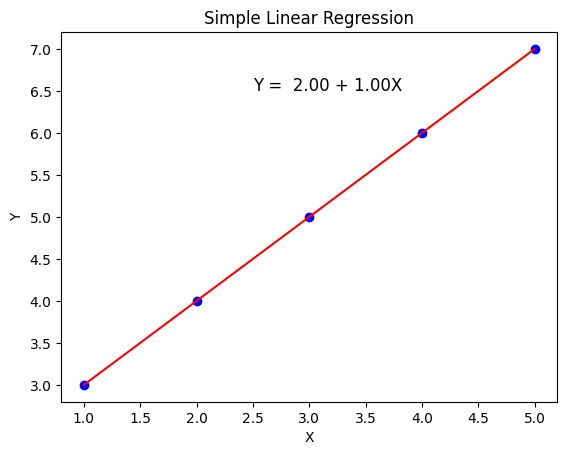

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])

df = pd.DataFrame({'x': x,  'y': y})

# Calculate the slope and intercept using the least squares method
# Polyfit fits a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg (1 in our case) to points (x, y).
# Returns a vector of coefficients p that minimises the squared error.
slope, intercept = np.polyfit(x, y, 1)

# Generate the regression line
regression_line = slope * x + intercept

# Plot the data points and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')

# Add the linear function equation to the plot
equation = f'Y =  {intercept:.2f} + {slope:.2f}X'
plt.text(2.5, 6.5, equation, fontsize=12)

# Show pandas
display(df)

# Show the plot
plt.show()

## 1.3 How to learn the model parameters
The goal of linear regression is to find the best-fit line that minimises the sum of the squared differences between the predicted values and the actual values of the dependent variable. **Ordinary Least Squares (OLS)** is a machine learning algorithm for learning a predictor for linear regression, namely the coefficients of a predictor that represent the best-fit line. <br>

For example, given the following dataset, how could we set a regression line?

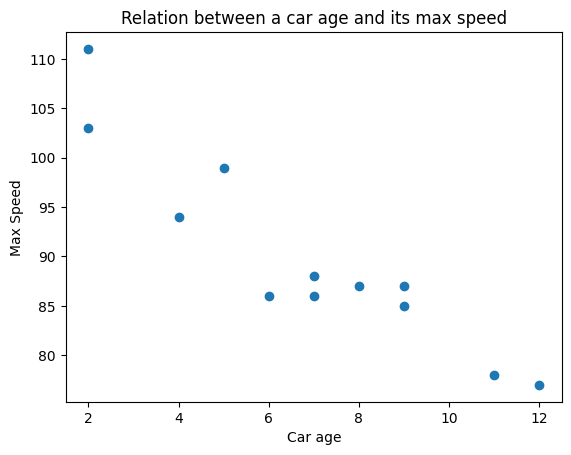

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# x = age of the car and y = max speed
x = [5,7,8,7,2,2,9,4,11,12,9,6]
y = [99,86,87,88,111,103,87,94,78,77,85,86]

df = pd.DataFrame({'x': x,  'y': y})

plt.scatter(x, y)
plt.xlabel('Car age')
plt.ylabel('Max Speed')
plt.title('Relation between a car age and its max speed')
plt.show()

There exists a multitude of regression models that can be generated, with an infinite number of possibilities. However, the question arises as to which particular model should be retained or chosen for analysis.

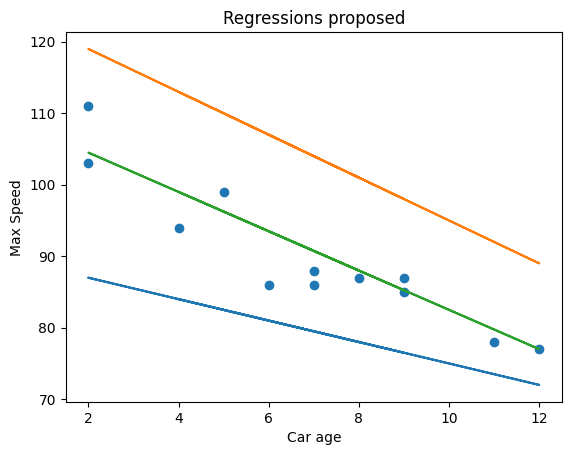

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import functools

def generate_regression_values(x, beta_0, beta_1):
  return  beta_0 + beta_1 * x

y_1 = list(map(functools.partial(generate_regression_values, beta_0 = 90, beta_1 = -1.5), x)) # y = 90 -1.5x
y_2 = list(map(functools.partial(generate_regression_values, beta_0 = 125, beta_1 = -3), x)) # y = 125 -3x
y_3 = list(map(functools.partial(generate_regression_values, beta_0 = 110, beta_1 = -2.75), x)) # y = 110 -2.75x


# Plot functions
plt.scatter(x, y)
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.xlabel('Car age')
plt.ylabel('Max Speed')
plt.title('Regressions proposed')
plt.show()

### 1.3.1 Simple linear regression

The goal of simple linear regression is to find the **best-fitting straight line** that minimises the sum of the squared differences (errors) between the observed values and the predicted values.
The OLS technique allows us to estimate the coefficients of a simple regression model by minimising the sum of squared differences between the observed and predicted values.

Consider a collection of observations $(x_1,y_1),\ldots,(x_n,y_n)$. In simple linear regression, where we have a single predictor variable $x$ and a target variable $y$, the goal is to compute the parameters $\beta_0$​ (intercept) and $\beta_1$​ (slope) that minimise the squared error (residual sum of squares, RSS) between predicted values and actual values.

$$\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i = 1}^{n} (y_i - \widehat{\beta_0} - \widehat{\beta_1} x_i)^2 = \|\mathbf{y} - \mathbf{\hat{y}} \|$$

The coefficients $\widehat{\beta_0}$ and $\widehat{\beta_1}$ represent the intercept and slope of the linear relationship between the feature variable (x) and the target variable (y). <br>

$\widehat{\beta_0}$: This coefficient represents the intercept or the value of the target variable (y) when the feature variable (x) is zero. In other words, it represents the expected or average value of y when x is zero.

$\widehat{\beta_1}$: This coefficient represents the slope or the change in the target variable (y) for each unit change in the feature variable (x). It indicates how much the target variable is expected to change on average for a one-unit increase in x.

The **closed-form solution** allows us to compute the estimators of $\widehat{\beta_0}$ and $\widehat{\beta_1}$ that minimise the RSS as follows:

$$ \widehat{\beta_0} = \overline{y} - \widehat{\beta_1} \overline{x}$$

$$ \widehat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2}$$

where $\overline{x}$ stands for the mean of vector $\mathbf{x} = (x_1,\ldots,x_n)$ and $\overline{y}$ stands for the mean of vector $\mathbf{y} = (y_1,\ldots,y_n)$. Notice that the optimal parameters can be obtained analytically; no approximation or iteration is required.

In practice, OLS solves linear regression with the **singular value decomposition (SVD)** of the *design matrix* (the matrix of training examples) instead of normal equations.

If interested, you can follow the detailed derivation of both estimators here: [OLS derivation][1]


[1]: <https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf>

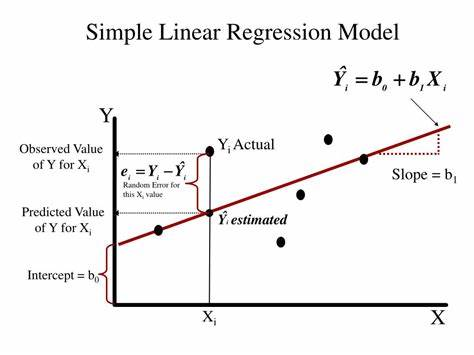

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/3. Linear regression/3_dibuix_simple.jpg')

How to calculate the linear regression by hand:

In [ ]:
import numpy as np

x = np.array([5, 7, 8, 7, 2, 2, 9, 4, 11, 12, 9, 6])
y = np.array([99, 86, 87, 88, 111, 103, 87, 94, 78, 77, 85, 86])

x_mean = np.mean(x)
y_mean = np.mean(y)

x_diff = x - x_mean
y_diff = y - y_mean

beta_1 = np.sum(x_diff * y_diff) /  np.sum(x_diff**2)
beta_0 = y_mean - (beta_1 * x_mean)

print("Beta 0:", beta_0)
print("Beta 1:", beta_1)

print("y = ", round(beta_0, 0), round(beta_1, 1), '·x')


Beta 0: 109.79178885630498
Beta 1: -2.8841642228739004
y =  110.0 -2.9 ·x


We can calculate linear regression using a machine learning library. The scikit library contains an implementation of Ordinary Least Squares Linear Regression.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the data in a DataFrame
data = pd.DataFrame({'x': [5, 7, 8, 7, 2, 2, 9, 4, 11, 12, 9, 6],
                     'y': [99, 86, 87, 88, 111, 103, 87, 94, 78, 77, 85, 86]})

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(data[['x']], data['y'])

# Extract the coefficients
beta_0 = round(model.intercept_, 1)
beta_1 = round(model.coef_[0], 1)

print("Beta 0:", beta_0)
print("Beta 1:", beta_1)

print("y = ", beta_0, beta_1, '·x')

Beta 0: 109.8
Beta 1: -2.9
y =  109.8 -2.9 ·x


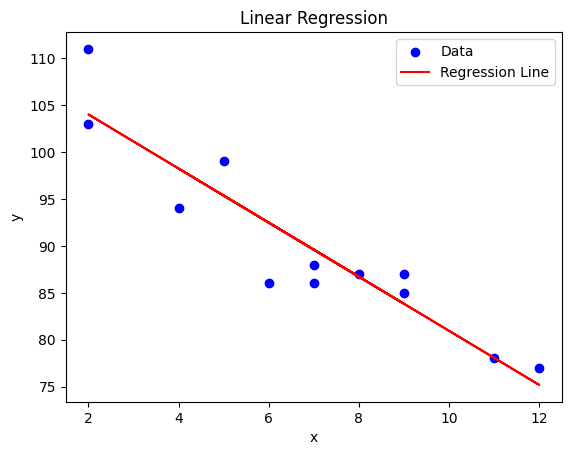

In [ ]:
# Plot the data points
plt.scatter(x, y, color='blue', label='Data')


# Plot the regression line
plt.plot(x, beta_0 + beta_1 * x, color='red', label='Regression Line')


# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')

# Add legend
plt.legend()

# Display the plot
plt.show()

**Exmple:** How does a software engineer’s **salary** change with **years of experience**?

- **Target (y):** annual salary (€)  
- **Feature (x):** years of experience  
- **Model:**
  $$
  \text{salary} \;=\; \beta_0 \;+\; \beta_1 \cdot \text{experience} \;+\; \varepsilon
  $$
- **Interpretation:** $ \beta_1 $ is the expected **€ increase per additional year** of experience.


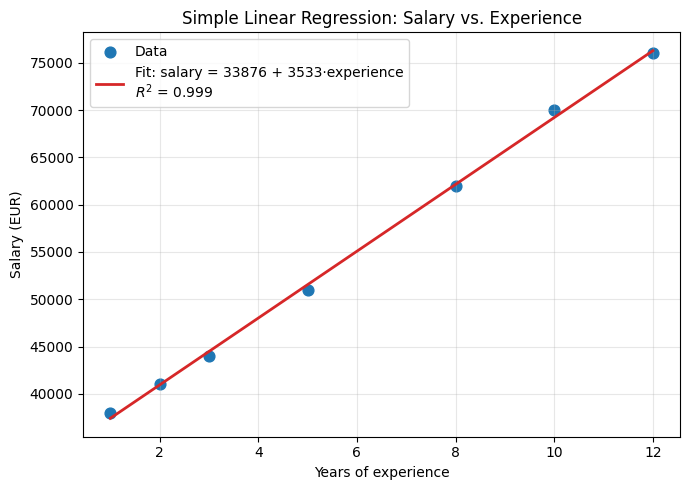

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
experience = np.array([1, 2, 3, 5, 8, 10, 12]).reshape(-1, 1)
salary = np.array([38, 41, 44, 51, 62, 70, 76]) * 1000

# Fit linear regression
model = LinearRegression().fit(experience, salary)
beta0, beta1 = model.intercept_, model.coef_[0]
r2 = model.score(experience, salary)

# Line for plotting
x_line = np.linspace(experience.min(), experience.max(), 200).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(experience, salary, color="tab:blue", s=60, label="Data")
plt.plot(x_line, y_line, color="tab:red", linewidth=2,
         label=f"Fit: salary = {beta0:.0f} + {beta1:.0f}·experience\n$R^2$ = {r2:.3f}")
plt.xlabel("Years of experience")
plt.ylabel("Salary (EUR)")
plt.title("Simple Linear Regression: Salary vs. Experience")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.3.2 Multiple linear regression

Say now that more than one independent variable is used to predict the value of a numerical dependent variable. The goal of multiple linear regression is to find the **best-fitting hyperplane** that minimises the sum of the squared differences (errors) between the observed values and the predicted values.
The OLS technique also allows us to estimate the coefficients of a multiple regression model by minimising the sum of squared differences between the observed and predicted values.

Consider a collection of observations $(\mathbf{x_1},y_1),\ldots,(\mathbf{x_n},y_n)$, where each $\mathbf{x_i}$ contains the values of $p$ features (independent variables). In multiple linear regression, where we have multiple predictor variables and a target variable $y$, the goal is to compute the parameters $\mathbf{\beta}$ that minimise the RSS between predicted values and actual values:

$$\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \|\mathbf{y} - \mathbf{X} \mathbf{\beta} \| = \|\mathbf{y} - \mathbf{\hat{y}} \|$$

where:
* $\mathbf{y}$ is the vector of observed values
* $X$ is the matrix of feature values (one row per feature vector $\mathbf{x_i}$), including ones for the intercept
* $\mathbf{\beta}$ is the vector of parameters to learn

The optimal parameters $\beta$ that minimise the RSS are:

$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$

This is the closed-form solution when the matrix $\mathbf{X}^\top \mathbf{X}$ is invertible (i.e., nonsingular). Thus, the determinant of $\mathbf{X}^\top \mathbf{X}$ must not be zero — so the inverse exists.

In practice, as mentioned above, OLS solves linear regression with the **singular value decomposition**(https://en.wikipedia.org/wiki/Singular_value_decomposition) of the design matrix instead of the normal equations. Thus, OLS avoids forming $(\mathbf{X}^\top \mathbf{X})^{-1}$.

Although it originated in statistics, in modern ML, OLS is a **baseline** algorithm for linear regression.


## Example: What drives a house’s sale price?

**Target (y):** sale price (€)

**Features (X):**
- $x_1$: living area (m²)  
- $x_2$: number of bedrooms  
- $x_3$: age of the property (years)  
- $x_4$: distance to city center (km)

**Model:**
$$
\text{price} \;=\; \beta_0 \;+\; \beta_1\,\text{area} \;+\; \beta_2\,\text{bedrooms} \;+\; \beta_3\,\text{age} \;+\; \beta_4\,\text{distance} \;+\; \varepsilon
$$

**Interpretation (holding others constant):**
- $\beta_1$: € change per additional m² of area  
- $\beta_2$: premium for an additional bedroom at fixed area (layout/amenities)  
- $\beta_3$: € change per extra year of age (often negative)  
- $\beta_4$: € change per additional km from the city center (often negative)


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "price":    [320_000, 450_000, 390_000, 520_000, 610_000],
    "area":     [65, 90, 80, 110, 130],
    "bedrooms": [2, 3, 3, 4, 4],
    "age":      [25, 10, 15, 8, 5],
    "distance": [8.0, 5.0, 6.5, 4.0, 3.0],
})

X = df[["area","bedrooms","age","distance"]]
y = df["price"]

lin = LinearRegression().fit(X, y)

# Build a readable equation string
intercept = float(lin.intercept_)
coefs = lin.coef_
terms = [f"{coef:+.2f}·{name}" for coef, name in zip(coefs, X.columns)]
equation = "price = " + f"{intercept:.2f} " + " ".join(terms)

print("Linear regression equation:")
print(equation)


Linear regression equation:
price = 224081.63 +3795.92·area -18163.27·bedrooms -1836.73·age -8571.43·distance


### Exercise

Given the following dataset, predict the expected price of a car, given the number of km and age. To do it:
* Identify whether it is a single or multiple linear regression
* Obtain the regression (slope and coefficients)
* What price can we expect for a car with 10000km and 13 years? and 0km and 0 years?



In [ ]:
import numpy as np
import pandas as pd

np.random.seed(40)

# Generate random values for num_km and age
num_km = np.random.uniform(low=0, high=100000, size=15)
age = np.random.uniform(low=0, high=10, size=15)

# Define the linear regression coefficients
slope = -0.1  # Negative slope, meaning as num_km and age increase, price_car decreases
intercept = 50000

# Generate the true prices based on the linear regression equation
true_prices = intercept + slope * num_km + slope * age

# Add some noise to the true prices
noise = np.random.normal(loc=0, scale=5000, size=15)
prices = true_prices + noise
prices = np.where(prices < 0, 0, prices)  # Ensure prices are positive

# Create the dataframe
data = {
    'price_car': prices,
    'num_km': num_km,
    'age': age
}

data = pd.DataFrame(data)
display(data)

,price_car,num_km,age
0,39026.025915,40768.702808,9.042672
1,56302.933627,5536.604011,4.499049
2,42253.090562,78853.487749,1.189247
3,45524.114968,28730.518479,8.353002
4,41265.439857,45035.058697,2.022482
5,44793.558147,30391.230534,1.742027
6,38050.383091,52639.952430,4.491471
7,44807.068930,62381.221288,6.697948
8,35109.681515,77677.545772,9.573991
9,40369.365949,68624.164537,8.333333


**Solution**

Regression:
price_car =  50990.4 -0.1 · num_km -266.1 · age
Expected price for a car with 10000km and 13 years:
46531.1
Expected price for a car with 0km and 0 years:
50990.4


## 1.4 How to interpret coefficients

The beta coefficients, also known as regression coefficients or model coefficients, represent the estimated change in the target variable (dependent variable) associated with a one-unit change in the corresponding feature (independent variable), while holding all other features constant.

When interpreting the beta coefficients in linear regression, here are a few guidelines:

* **Sign:** The sign (+ or -) of the coefficient indicates the direction of the relationship between the feature and the target variable. A positive coefficient means that an increase in the feature value is associated with an increase in the target variable, while a negative coefficient means that an increase in the feature value is associated with a decrease in the target variable.

* **Magnitude:** The magnitude of the coefficient represents the estimated change in the target variable for a one-unit change in the corresponding feature. Larger magnitude coefficients indicate a stronger influence of the feature on the target variable.

* **Relative Importance:** Comparing the magnitudes of the coefficients can provide insights into the relative importance of different features in predicting the target variable. Features with larger coefficients generally have a greater impact on the target variable.

* **Statistical Significance:** It is important to consider the statistical significance of the coefficients, which is usually determined by their p-values. A low p-value (typically below 0.05) suggests that the coefficient is statistically significant and provides reliable evidence of a relationship between the feature and the target variable.

Note that interpreting coefficients becomes more complex in the presence of multicollinearity, where the relationships between features are correlated. In such cases, the interpretation should focus on the direction and relative importance of the coefficients rather than precise individual impacts.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.DataFrame(data)

X = df[['num_km', 'age']]  # Features
y = df['price_car']  # Target variable

# Adds intercept term
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_car   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     3.183
Date:                Wed, 08 Oct 2025   Prob (F-statistic):             0.0778
Time:                        11:25:19   Log-Likelihood:                -146.25
No. Observations:                  15   AIC:                             298.5
Df Residuals:                      12   BIC:                             300.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.099e+04   3698.661     13.786      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Let's analyse the p-values for the coefficients (column P>|t|). In the example, we see that the p-value for the coefficient of num_km ($\hat{\beta}_1 \approx 0.031$) is small(< 0.05), but this is not the case for the coefficient for age ($\hat{\beta}_2 \approx 0.566$). Therefore, we have no strong statistical evidence that feature age contributes meaningfully to the prediction.

Furthermore, since the condition number (the value of $(\mathbf{X}^\top \mathbf{X})^{-1}$) is large, it means that the model may suffer from multicollinearity (features are correlated) or numerical instability, which can distort the estimation of coefficients and reduce trust in statistical inference.


# 2. Model Evaluation
Model evaluation is the process of assessing and measuring the effectiveness and efficiency of an algorithm in achieving its intended objectives. In the context of data analysis, machine learning, and predictive modelling, model evaluation is crucial to determine the quality and reliability of the developed models.

Next, we evaluate several **core metrics** for evaluating regression models.

## 2.1 Model fit quality

It involves examining how well the model fits the observed data and whether it captures the underlying patterns and relationships.

* **R-squared (Coefficient of Determination)**: is a statistical measure that quantifies the proportion of the variance in the dependent variable $y$ that is explained by the independent variables in a regression model. It helps assess whether the model is capturing **real structure** in the data or just random noise. We compute R-squared as:
$$R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i}(y_i - \widehat{y_i})^2}{\sum_{i}(y_i - \overline{y})^2}$$
<br>
where $SS_{res}$ (Sum of Squared Residuals) is the sum of the squared differences between the predicted values and the actual values, and $SS_{tot}$ (Total Sum of Squares) is the sum of the squared differences between the actual values and the mean of the dependent variable <be>

Intuitive interpretation: it tells you how much of the total variation in $y$ is captured by your model. R-squared ranges from 0 to 1:
  * 0 indicates that the model explains none of the variance in $y$
  * 1 indicates that the model explains all of the variance in the dependent variable
  * 0.75 indicates that the model explains 75% of the variance in $y$.

Adding more features always increases the R-squared value, even if they are useless. That's why we also use **Adjusted R-squared**, which penalises adding uninformative features.

* **Adjusted R-squared**:  is an extension of R-squared that accounts for the number of predictors in the model and adjusts for the degrees of freedom. It penalises the inclusion of additional predictors that may not contribute significantly to the model's performance. Adjusted R-squared provides a more accurate measure of the model's goodness of fit, especially when comparing models with different numbers of predictors. <br> <br>
$$Adjusted R^{2} = 1 - (1-R^2) \cdot \frac{n-1}{n-p-1}$$
 <br>
Where $n$ is the sample size and $p$ is the number of predictors in the model.

Adjusted R-squared adjusts for this increase in variables, and its value decreases when a feature does not improve the model.

To summarise:

| Task                                                      | Preferred Metric |
| --------------------------------------------------------- | ---------------- |
| Checking **fit quality** (explained variance)             | $R^2$            |
| Comparing **models** with different numbers of predictors | Adjusted $R^2$   |


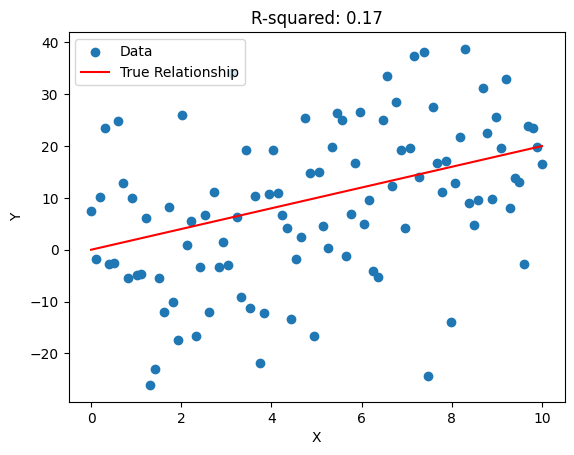

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random x values
x = np.linspace(0, 10, 100)

# Generate random y values with a weak linear relationship to x
y = 2 * x + np.random.normal(scale=15, size=x.shape)

# Calculate the R-squared value
r_squared = r2_score(y, 2 * x)

# Plot the data
plt.scatter(x, y, label='Data')
plt.plot(x, 2 * x, color='red', label='True Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'R-squared: {r_squared:.2f}')
plt.legend()
plt.show()

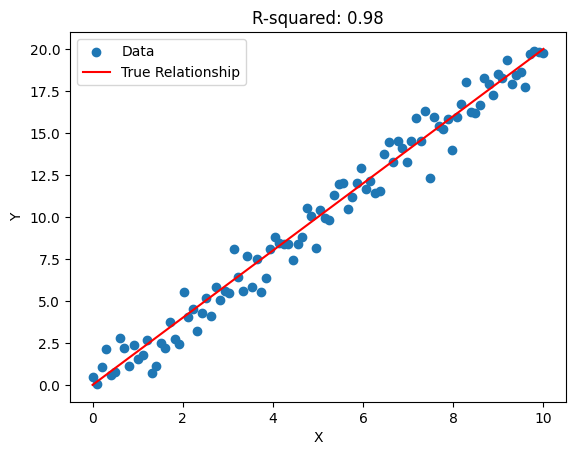

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random x values
x = np.linspace(0, 10, 100)

# Generate random y values with a weak linear relationship to x
y = 2 * x + np.random.normal(scale=1, size=x.shape)

# Calculate the R-squared value
r_squared = r2_score(y, 2 * x)

# Plot the data
plt.scatter(x, y, label='Data')
plt.plot(x, 2 * x, color='red', label='True Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'R-squared: {r_squared:.2f}')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset
np.random.seed(42)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
x4 = np.random.normal(0, 1, n)
x5 = np.random.normal(0, 1, n)
y = 2*x1 + 3*x2 + 4*x3 + 5*x4 + 6*x5 + np.random.normal(0, 8, n)

# Create a DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'y': y})

# Split features and target
X = data[['x1', 'x2', 'x3', 'x4', 'x5']]
y = data['y']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate R-squared and Adjusted R-squared
n = len(y)
k = X.shape[1]
r_squared = r2_score(y, predictions)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - k - 1)

# Round numbers
r_squared = round(r_squared, 2)
adjusted_r_squared = round(adjusted_r_squared, 2)

# Print R-squared and Adjusted R-squared
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

R-squared: 0.61
Adjusted R-squared: 0.59


The linear regression model is fitted to the data, and the R-squared value is calculated. However, with the inclusion of multiple predictors, the R-squared value can be artificially inflated.

To account for the number of predictors and the degrees of freedom in the model, the adjusted R-squared is calculated. The adjusted R-squared penalizes the inclusion of additional predictors that may not contribute significantly to the model's performance. In this case, with five predictors, the adjusted R-squared is expected to be lower than the R-squared value. The adjusted R-squared provides a more accurate measure of the model's goodness of fit by considering the complexity of the model and the sample size.

## 2.2 Evaluating model performance (prediction accuracy)

When your goal is to evaluate a model's **prediction accuracy**, especially on new or unseen data, the most appropriate metrics are **error-based**, not variance-explained metrics like $R^2$.

* **Mean Squared Error (MSE)**: measures the average squared difference between the predicted values and the true values. The MSE value is always non-negative, with a lower value indicating better model performance. However, MSE is sensitive to outliers since it squares the differences. **Notice that MSE is just RSS divided by $n$**:<br /> <br />
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y_i})^2$$ <br />
* **Root Mean Squared Error (RMSE)**: is a variant of Mean Squared Error that takes the square root of the MSE to obtain the root mean squared difference between the predicted and true values. RMSE is often preferred as it has the same scale as the original target variable and is easier to interpret (“On average, my model’s predictions are off by about X units.”). Similar to MSE, a lower RMSE value indicates better model performance. RMSE is also sensitive to outliers due to the squaring operation in MSE. <br /> <br />
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y_i})^2}$$

MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) are very common metrics in machine learning, especially for evaluating regression models. In fact, MSE is also the default **loss function**, namely the objective function to optimise during training. Many algorithms (like decision trees, random forests, neural networks for regression) are trained to minimise MSE.

In the next lectures, when evaluating **generalisation performance** of a machine learning model, we will always compute these metrics on a test set, or via cross-validation.

## Example: Predicting diabetes disease progression

- **Task:** Predict a **quantitative measure of diabetes disease progression** one year after baseline.  
- **Samples:** **442** patients in the sklearn Diabetes dataset.
- **Features (10 numeric, already standardised):** age, sex, body mass index, average blood pressure, etc.
- **Target:** `y` — continuous progression score (not standardised by default in the loader).  

If your goal is **parameter estimation/inference** (not prediction), you can use all the data in the dataset, but for **predictive performance**, we have to split the dataset into training/test or training/validation/test.

In [ ]:
# Example: train/test split, fit Linear Regression, compute MSE & RMSE

import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Load a real regression dataset
# Features are already standardised!
X, y = load_diabetes(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit linear regression on the training set
model = LinearRegression().fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate: MSE and RMSE on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE (test):  {mse:.4f}")
print(f"RMSE (test): {rmse:.4f}")

MSE (test):  2900.1936
RMSE (test): 53.8534


## Example: Why use both $R^2$ and MSE?

- **Complementary Information:** R-squared tells you how well your model explains the data's underlying patterns, while MSE tells you how far off your predictions are in absolute terms.

- **Different Perspectives:** a model can have a high R-squared but a high MSE if the errors are consistently large, or a low R-squared and a low MSE if it generally doesn't explain much but its predictions are close where it does.


In [ ]:
# Two scenarios: showing that R^2 and MSE tell different stories

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

rng = np.random.default_rng(0)
n = 2000
test_size = 0.2

#
# Case 1: High R^2 but large MSE (house prices: big absolute scale)
# y = 500k + 80k*x + noise(σ=50k), x ~ N(0, 2)
#
x1 = rng.normal(loc=0.0, scale=2.0, size=n)
y1 = 500_000 + 80_000 * x1 + rng.normal(scale=50_000, size=n)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1.reshape(-1, 1), y1, test_size=test_size, random_state=0
)

m1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = m1.predict(X1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y1_test, y1_pred)

print(" Case 1: House prices (High R^2, large MSE) ")
print(f"R^2 (test):  {r21:.3f}")
print(f"MSE (test):  {mse1:,.0f}")
print(f"RMSE (test): {rmse1:,.0f}\n")

#
# Case 2: Low R^2 but small MSE (thermostat: tiny natural variance)
# y = 20 + 0.005*x + noise(σ=0.047), x ~ N(0, 1)
#
x2 = rng.normal(loc=0.0, scale=1.0, size=n)
y2 = 20.0 + 0.005 * x2 + rng.normal(scale=0.047, size=n)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    x2.reshape(-1, 1), y2, test_size=test_size, random_state=0
)

m2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = m2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y2_test, y2_pred)

print("Case 2: Thermostat (Low R^2, small MSE) ")
print(f"R^2 (test):  {r22:.3f}")
print(f"MSE (test):  {mse2:.6f}")
print(f"RMSE (test): {rmse2:.3f}")


 Case 1: House prices (High R^2, large MSE) 
R^2 (test):  0.910
MSE (test):  2,488,663,618
RMSE (test): 49,887

Case 2: Thermostat (Low R^2, small MSE) 
R^2 (test):  0.005
MSE (test):  0.002236
RMSE (test): 0.047


## 2.3 Summary

| Task                                                      | Preferred Metric |
| --------------------------------------------------------- | ---------------- |
| Checking **fit quality** (explained variance)             | $R^2$            |
| Comparing **models** with different numbers of predictors | Adjusted $R^2$   |
| Evaluating **prediction accuracy**      | RMSE or MSE      |
| Minimizing large errors                                   | RMSE             |

In summary:
* Use MSE when you want to evaluate the magnitude of prediction errors and how well the model's predictions match the actual values.
* Use R-squared when you want to measure the overall fit and explanatory power of the model.

# 3. Logistic regression

In the linear regression section, we explored how to construct a model to make continuous numerical predictions. But what if we want to build a model to answer questions like "Will it rain today?" or "Is this email spam?". This section introduces a new type of regression model called **logistic regression** that is designed **to predict the probability of a given (binary) outcome**.

How can a logistic regression model ensure its output represents a probability, always outputting a value between 0 and 1. There's a family of functions called logistic functions whose output has those same characteristics. The standard logistic function, also known as the **sigmoid function** (sigmoid means "s-shaped"), has the formula:

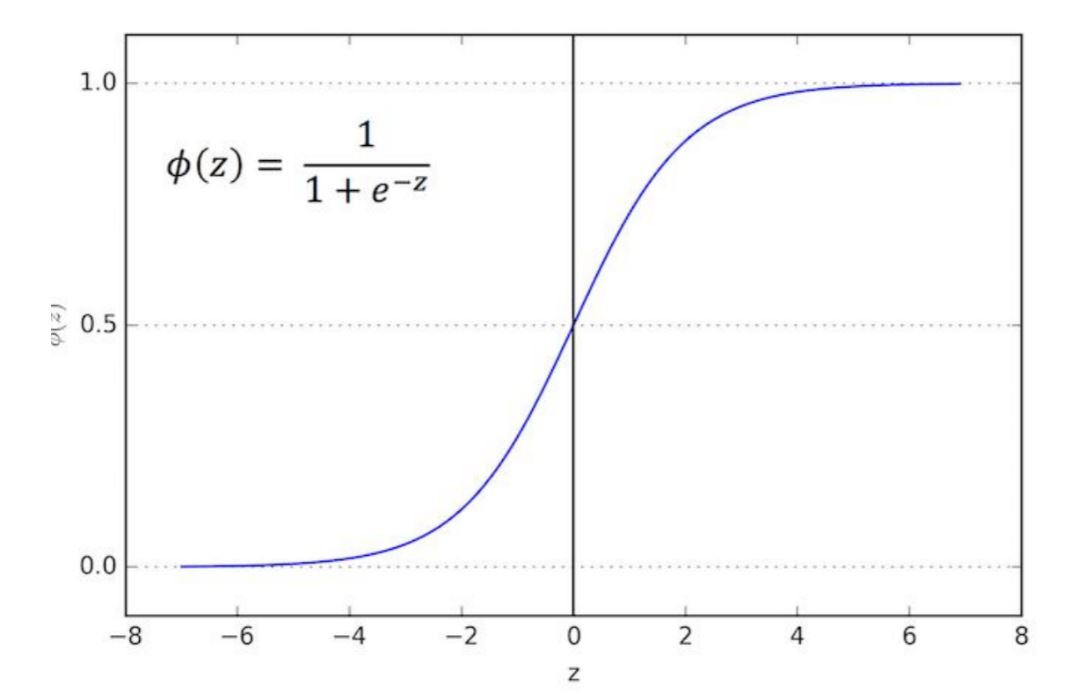

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/3. Linear regression/4_sigmoid.JPG')

The following equation represents the linear component of a logistic regression model:

$$ z = \beta_0 + \beta_1 x_1 + \ldots \beta_n x_n$$

where:

* $z$ is the output of the linear equation, also called log-odds
* $\beta_0$ is the intercept
* The $\beta$ values are the model's learned coefficients (or weights)
* The $x$ values are the feature values for a particular example

A logistic regression model estimates the probability of the occurrence of a particular outcome based on the values of the independent variables.

To obtain the logistic regression prediction, the z value is then passed to the sigmoid function, yielding a value (a probability) between 0 and 1:

$$ p = \frac{1}{1 + e^{-z}} $$

[Derivation][2]

**Learning a logistic regression** model amounts to <ins>estimating the coefficients for the intercept and each independent variable, indicating the strength and direction of their association with the outcome</ins>. These coefficients are used to calculate the predicted probability of the outcome for a given set of features' (independent variables') values.

[2]: <http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html>

The following figure illustrates how the linear output is transformed into a logistic regression output.

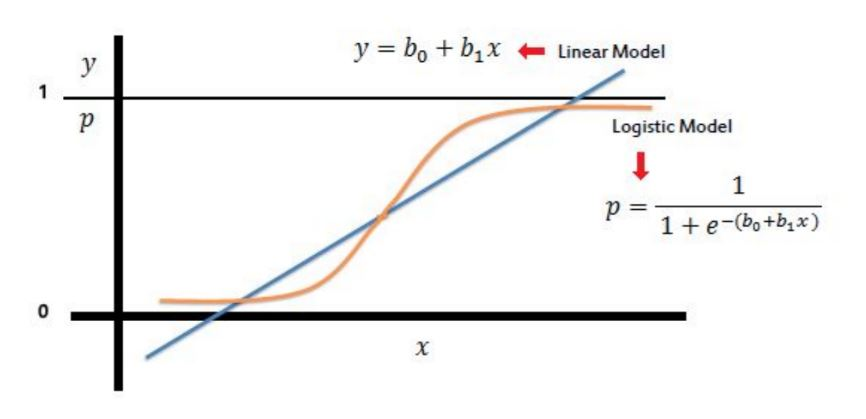

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/3. Linear regression/5_sigmoid2.JPG')

$z$ is referred to as the **log-odds** because if you start with the following sigmoid function $p = \frac{1}{1 + e^{-z}}$ (where $p$ is the output of a logistic regression model, representing a probability), and then solve for $z$:

$$ z = log\left(\frac{p}{1-p}\right)$$

Then $z$ is the log of the ratio of the probabilities of the two possible outcomes: $p$ and $1 – p$.

## 3.1 Learning a logistic regression model: the Log Loss function

Logistic regression models are trained using **Log Loss** as the loss function instead of **squared loss**.

When learning a linear regression model, we use squared loss (also called L2 loss) as the loss function. Squared loss works well for a linear model where the rate of change of the output values is constant. For example, given the linear model $y' = b + 3x_1$, each time you increment the input value by 1, the output value increases by 3.

However, the rate of change of a logistic regression model is not constant. The sigmoid function is S-shaped rather than linear. When the log-odds ($z$) value is closer to 0, small increases in $z$ result in much larger changes to $y$ than when $z$ is a large positive or negative number. If you used squared loss to calculate errors for the sigmoid function, as the output got closer and closer to 0 and 1, you would need more memory to preserve the precision needed to track these values.

Instead, the loss function for logistic regression is Log Loss. The Log Loss equation returns the logarithm of the magnitude of the change, rather than just the distance from data to prediction.  Log loss measures the difference between actual binary labels and predicted probabilities, with lower log loss indicating a better-performing, well-calibrated model that confidently and correctly predicts probabilities. Log Loss is calculated as follows:

$$\text{Log Loss} = - \frac{1}{n} \sum_{\langle x^i,y^i)\in \mathcal{D}} [-y^i \log(p_ i) - (1 - y^i)\log(1 - p_i)]$$

where:

* $n$ is the number of training examples in dataset $\mathcal{D}$.
* $\langle x^i,y^i\rangle\in D$  is the i-th training example in the dataset $\mathcal{D}$.
* $y^i$ is the actual label (0 or 1), or ground truth, in the i-th training example.
* $p_i$ is the predicted probability of the $i$-th example, $x^i$, being in class 1, namely $p_i = P(y^i = 1 | x_i)$.
* $(1 - y^i)\log(1 - p_i)$ is the term that handles cases where the true label is 0. If $y^{i}=0$, this term becomes $log (1-p_{i})$, which penalises predictions that are high for class 1 when it should be class 0.

When analysing the log loss function, we observe that its goals are to:

* **quantify performance:** Log loss quantifies the difference between a model's predicted probabilities and the true labels.
* **penalise incorrect confidence:** It heavily penalises predictions that are confident but wrong, meaning that when the model is certain of a prediction that is incorrect, the loss value will be very high.
* **encourage accurate probabilities:** The goal of optimising log loss is to produce well-calibrated probabilities that accurately reflect the likelihood of different classes.

Examples:
* If $y^i=1$ and $p_i=0.9$, then $loss = −log⁡(0.9) \approx 0.105$ (good).
* If $y^i=1$ and $p_i=0.01$, then $loss = −log⁡(0.01) \approx 4.605$ (very bad).


**LEARNING AS OPTIMISATION:** Learning a logistic regression model amounts to finding the values of the intercept and the coefficients in the logistic function that **minimise** the log loss function.



## 3.2 Deriving the Log Loss function

**Model.** Assume a Bernoulli label with probability $ p(x) = P(y=1 \mid x) $.
Bernoulli label means the target $y$ is modelled as a Bernoulli random variable: it can take only two values (usually 0 or 1) with

$$P(y=1∣x)=p$$
$$P(y=0∣x)=1−p.$$

So for each example $x$, there is a single trial with “success” (class 1) or “failure” (class 0).

With logistic regression,

$$p(x)=\sigma(z)=\frac{1}{1+e^{-z}}, \qquad z = w^\top x + b .$$

**Likelihood of the data** $\{(x^i, y^i)\}_{i=1}^n$:

$$
\mathcal{L}(\mathbf{\beta})
= \prod_{i=1}^n p(x^i)^{y^i}\,[1 - p(x^i)]^{\,1-y^i}.
$$

**Log-likelihood** (turn product into sum):

$$
\log \mathcal{L}(\mathbf{\beta})
= \sum_{i=1}^n \Big[ y^i \log p(x^i) + (1 - y^i)\log\big(1 - p(x^i)\big) \Big].
$$

**Loss = negative average log-likelihood (NLL / log loss)** to turn maximisation into minimisation:

$$
\boxed{
\mathcal{L}_{\text{log}}
= -\frac{1}{n}\sum_{i=1}^n
\Big[ y^i \log p(x^i) + (1 - y^i)\log\big(1 - p(x^i)\big) \Big]
}.
$$

**Why the log of the likelihood?**

First, and very importantly, using logs <ins>does not change the optimum</ins>.
That said, we take logs of the likelihood for important reasons that affect the learning algorithm:

* **Numerical stability (avoid underflow).** Likelihoods multiply many probabilities. For large $n$, this becomes tiny, which **underflows**. Underflow is a floating-point issue where a number is so close to zero that it can’t be represented with the available precision. The result is a subnormal (denormal) number with very low precision, or it gets rounded to 0 entirely. Logs turn products into sums, which stay in a safe numeric range.
* **Optimisation convenience (sums, simple gradients).** Sums are easier to optimise. For logistic/softmax models, the negative log-likelihood (log loss) yields clean gradients and, in many exponential-family cases, a **convex objective function**.


## 3.3 Decision boundary

The sigmoid function generates a probability value ranging from 0 to 1, which is then used to assign a discrete class, either "0" or "1". To assign this probability value to a specific class (such as pass/fail, yes/no, true/false, spam/ no spam), a threshold value is chosen, known as the **decision boundary**. If the probability value exceeds this threshold, it is mapped to class 1; otherwise, it is mapped to class 0.

In mathematical terms:

* If p ≥ d, then class = 1

* If p < d, then class = 0

where $d \in (0,1)$ is the decision boundary.

Typically, the decision boundary is set at 0.5. For instance, if the probability value is 0.75 (> 0.5), the observation is assigned to class 1. Conversely, if the probability value is 0.25 (< 0.5), the observation is assigned to class 0. This concept is illustrated in the graph below.



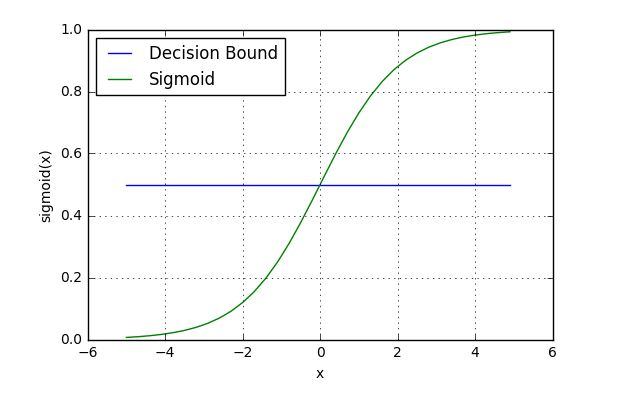

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/3. Linear regression/6_decision.JPG')

## Example:

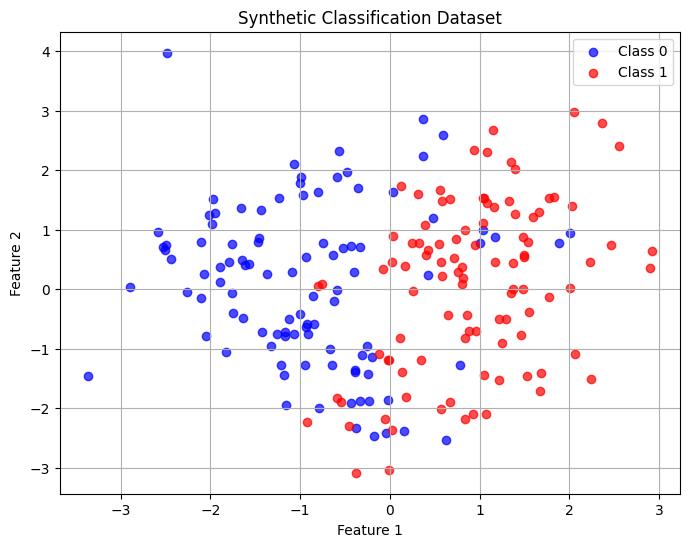

First 10 examples from the dataset:
Example 1: Features = [ 1.68976749 -1.40824123], Label = 1
Example 2: Features = [ 1.53028665 -1.45984815], Label = 1
Example 3: Features = [-1.17504152 -1.44763291], Label = 0
Example 4: Features = [-2.58539507  0.96353224], Label = 0
Example 5: Features = [1.3722458  0.44069537], Label = 1
Example 6: Features = [0.73193614 0.84975297], Label = 1
Example 7: Features = [-2.10684207 -0.15600516], Label = 0
Example 8: Features = [-0.93601605  0.54328249], Label = 0
Example 9: Features = [-1.64699537  0.4934092 ], Label = 0
Example 10: Features = [0.42536148 0.24142692], Label = 0

Model Evaluation:
Accuracy: 0.8

Sample Predictions for test samples (unseen during training!):
Input: [2.05117578 2.98103281], True Label: 1, Predicted Probability (class 1): 0.970
Input: [0.36578829 2.23297154], True Label: 0, Predicted Probability (class 1): 0.553
Input: [ 0.64868047 -0.42879158], True Label: 1, Predicted Probability (class 1): 0.783
Input: [0.40293432 0.5

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Generate synthetic binary classification dataset
X, y = make_classification(n_samples=200,    # number of samples
                           n_features=2,     # number of features
                           n_informative=2,  # number of informative features
                           n_redundant=0,    # no redundant features
                           random_state=42)

# Visualise the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.legend()
plt.grid(True)
plt.show()

# 2. Print 10 examples from the dataset
print("First 10 examples from the dataset:")
for i in range(10):
    print(f"Example {i + 1}: Features = {X[i]}, Label = {y[i]}")

# 3. Split the dataset into training and testing subsets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialise and train a logistic regression model
# We can set the algorithm to use to solve the optimisation problem. Default is ‘lbfgs’.
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predict class labels and probabilities on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class 1

# 6. Evaluate classifier performance
# accuracy_score: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
#
# The following report will be analysed in subsequent sessions when discussing model evaluation
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Display predictions for the first 5 test samples
print("\nSample Predictions for test samples (unseen during training!):")
for i in range(5):
    print(f"Input: {X_test[i]}, True Label: {y_test[i]}, Predicted Probability (class 1): {y_proba[i]:.3f}")

# 8. Display the learnt regression model

# Retrieve the beta coefficients
beta_coeffs = model.coef_
intercept = model.intercept_

# Print the beta coefficients
print("\n Beta Coefficients:")
print(beta_coeffs)
print("Intercept:")
print(intercept)

# Retrieve the beta coefficients
beta_coeffs = model.coef_[0]
intercept = model.intercept_[0]

# Get the feature names
X_df = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(X.shape[1])])
feature_names = X_df.columns.tolist()

# Build the logistic regression equation string
equation = "z = {} + ".format(round(intercept,2))
for i in range(len(beta_coeffs)):
    equation += "({} * {}) + ".format(round(beta_coeffs[i],3), feature_names[i])

# Remove the trailing " + " from the equation string
equation = equation[:-3]

# Print the logistic regression equation
print("Logistic Regression Equation:")
print(equation)


print("Probability: 1 / (1 + e^-z)")





Now let's compute the decision boundary. A logistic regression model computes:

$$\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{where} \quad z = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$


$$\hat{y} = 0.5 \quad \Leftrightarrow \quad z = 0 \quad \Leftrightarrow \quad \beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$$

This equation defines a line (or hyperplane in higher dimensions) that separates the two classes. So the boundary is the line:

$$x_2 = -\frac{\beta_0 + \beta_1 x_1}{\beta_2}$$

Let's compute it and plot it in our example.

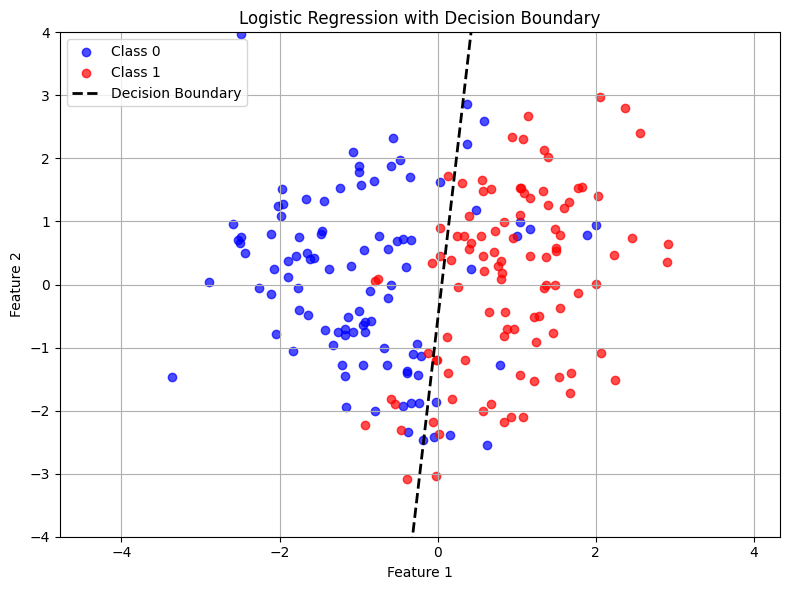

In [ ]:
# 6. Plot data points and decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.7)

# Extract coefficients for decision boundary
b0 = model.intercept_[0]
b1, b2 = model.coef_[0]

# Compute line: b0 + b1*x1 + b2*x2 = 0 ⇒ x2 = -(b0 + b1*x1) / b2
x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
x2_vals = -(b0 + b1 * x1_vals) / b2

# Plot decision boundary
plt.plot(x1_vals, x2_vals, 'k--', linewidth=2, label='Decision Boundary')

# Final plot formatting
plt.ylim(-4, 4)  # limit y-axis
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Decision Boundary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now we would like to visualise the learning dynamics of a classifier. For that, we will employ a different model, an SGDClassifier, which will allow us to observe its optimisation dynamics, namely, to observe how the model’s loss and accuracy evolve over time, as training evolves. We will show how the clssifier learns by reducing the loss, as training goes, until convergence. Notice that we will use the same dataset that we have employed so far.

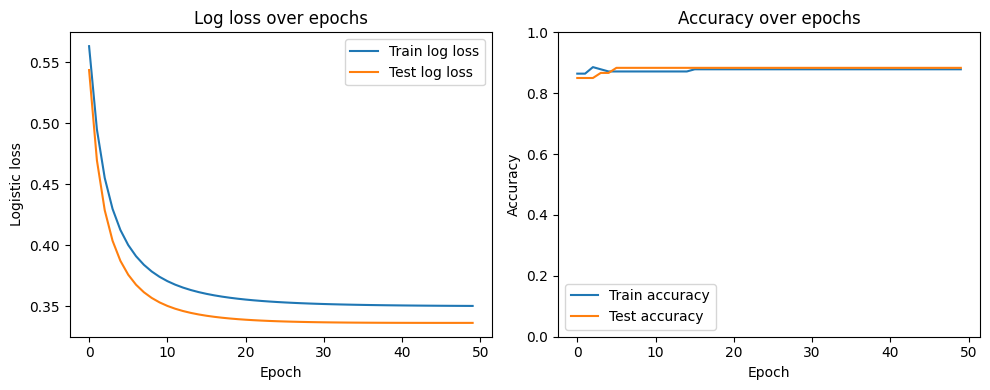

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
import pandas as pd


warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 1) Generate a synthetic binary classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3) Scale features (fit on train, transform both)
# StandardScaler is a preprocessing step that standardises your features so they all have:
# mean=0 and standard deviation=1
# Since we will train an SGDClassifier, StandardScaler is pretty much essential for stable convergence.
# WARNING: scale training and test sets separately!!!
scaler = StandardScaler()
# fit_transform() = compute μ and σ for each feature on X_train, then scale it to ~mean 0, std 1
X_train = scaler.fit_transform(X_train)
# transform() = use the training μ and σ to scale X_test (prevents data leakage: we cannot use test data to compute μ and σ
# to scalarise training data because we would be leaking information about the test set!)
X_test  = scaler.transform(X_test)

# 4) SGD logistic regression with loss tracking
# max_iter=1 means “do just one epoch per .fit() call.”
# warm_start=True means “keep the current weights (betas) when calling .fit() again instead of starting from scratch.”
# IMPORTANT NOTE: Normally, you would let SGDClassifier run until convergence in one call, and you would use the following code instead:
# clf = SGDClassifier(max_iter=1000, tol=1e-3)
# clf.fit(X_train, y_train)
# That would tell the SGDClassifier to do all the epochs (iterations) internally, returning only the final model.
# Here we do the training step by step for educational purposes: it’s easier to understand optimisation dynamics when you can visualise them epoch-by-epoch.

clf = SGDClassifier(
    loss='log_loss',          # use log loss function
    max_iter=1,               # one pass per .fit() call
    learning_rate='constant',
    eta0=0.01,
    warm_start=True,
    random_state=42
)

loss_train, loss_test = [], []
acc_train, acc_test   = [], []

# Labels in ±1 for log loss calculation
y_train_signed = np.where(y_train == 1, 1, -1)
y_test_signed  = np.where(y_test  == 1, 1, -1)

for _ in range(50):  # epochs
    clf.fit(X_train, y_train)

    # margins
    m_train = clf.decision_function(X_train)
    m_test  = clf.decision_function(X_test)

    # log loss
    loss_train.append(np.mean(np.logaddexp(0.0, -y_train_signed * m_train)))
    loss_test.append(np.mean(np.logaddexp(0.0, -y_test_signed  * m_test)))

    # accuracy
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

# 5) Plot loss curves
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(loss_train, label='Train log loss')
plt.plot(loss_test,  label='Test log loss')
plt.xlabel('Epoch')
plt.ylabel('Logistic loss')
plt.title('Log loss over epochs')
plt.legend()

# 6) Plot accuracy curves
plt.subplot(1,2,2)
plt.plot(acc_train, label='Train accuracy')
plt.plot(acc_test,  label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


**Visualising the optimisation dynamics**

Let's go one step further to visualise the dynamics of the optimisation. Next, we plot the loss function as a surface and how the values of the coefficients (weights) change as training evolves. Although the goal of the training is to find the values of coefficients and intercept that minimise the loss function, here we only show how the coefficients evolve so that we can visualise the dynamics of the optimisation in 3D. For that, we plot the loss surface using the intercept value learnt by the model.

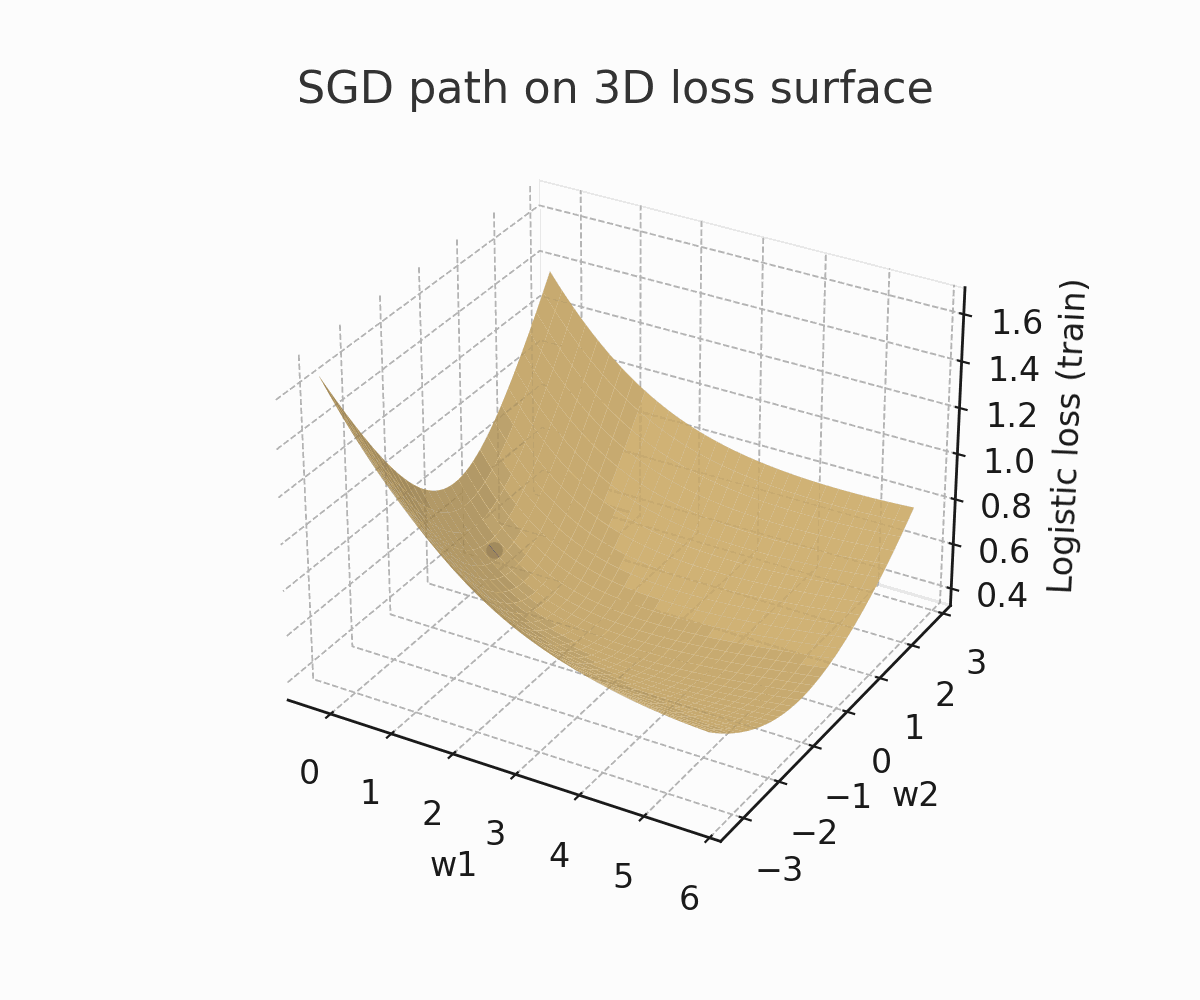

In [2]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Class 25-26/3.Images/3. Linear regression/sgd_3d_path_orange.gif')

**Learning in the scaled space**

Notice that *SGDClassifier* learns coefficients in the scaled space (after StandardScaler). If you want to use the classifier with unseen data in the original feature units, you have to convert the learned model to the original (unscaled) feature space. This amounts to converting the coefficients and the intercept as follows.

If x_scaled = (x - mean)/scale, then the learned model

$$ z = w_{\text{scaled}}^\top x_{\text{scaled}} + b_{\text{scaled}} $$

is equivalent in the original space to

$$z = w_{\text{orig}}^\top x + b_{\text{orig}}$$

with

$$  w_{\text{orig}} = \frac{w_{\text{scaled}}}{\text{scale}}, \quad
 b_{\text{orig}} = b_{\text{scaled}} - w_{\text{orig}}^\top \text{mean}$$

The following code shows the difference between the coefficients and intercept of the learned model in the scaled space and the original space.

In [ ]:
# After you've trained 'clf' and you have your fitted scaler:
w_scaled = clf.coef_.ravel()         # coefficients in scaled space
b_scaled = float(clf.intercept_[0])  # intercept in scaled space

mean = scaler.mean_                  # from StandardScaler().fit(...)
# standard deviation
scale = scaler.scale_

w_orig = w_scaled / scale
b_orig = b_scaled - np.dot(w_orig, mean)

print(f"In scaled space:  w={w_scaled},  b={b_scaled:.6f}")
print(f"In original space: w={w_orig},  b={b_orig:.6f}")


In scaled space:  w=[ 2.73113651 -0.19012585],  b=-0.002810
In original space: w=[ 2.2223787 -0.1397635],  b=0.051540


# 4. Data leakage

Data leakage occurs when information from outside the training dataset that is not available at the time of prediction is included in the training process. Common causes include:

* **Improper data splitting:** Mixing data from the test set into the training set, giving the model exposure to information it should not have.

* **Including future data in the training set:** Using information that is recorded after the event you are trying to predict, such as a customer's future purchase history when predicting their initial likelihood to buy.

* **Incorrect feature engineering:** Creating features that inadvertently contain information from the target variable, even if it is not directly the target variable itself.

## 4.1 Case studies

First, notice that in the example above, we have scaled features through Z-score scaling (see Notebook 2). Before scaling, we have divided the data into training and test sets. Why? This prevents **data leakage**, namely to use data from outside the training dataset to create the model that will not be available when the model is used for prediction. One type of data leakage is the so-called **train-test contamination.** We have learned that standardising the numerical features so they all have the same scale is a common preprocessing step, which is helpful for many machine learning algorithms. Suppose that the data scientist applies standardisation to the entire dataset before splitting it into training and test datasets. In that case, the model will indirectly "see" information from the test set during training. As a result, the model's performance on the test data might appear artificially inflated because the test set's information was used in the preprocessing step. This makes it easier for the model to perform well on the test set but potentially reduces its ability to generalise to new, unseen data. This is known as train-test contamination.

In general, preprocessing steps such as scaling, imputation or feature selection should be applied only on the training data rather than on the entire dataset before splitting to avoid data leakage.

### Example: Data Leakage When You Don’t Split a Dataset (train/test contamination)

#### Scenario: Predicting House Prices

Suppose you have a dataset of houses with the following features:

* `num_bedrooms`
* `square_meters`
* `year_built`
* `zip_code`
* `price` (target variable)

You train a model on the **entire dataset** (without splitting into train/validation/test).

Because the model sees **all the data during training**, it can “memorise” patterns that should not be available when predicting unseen houses.

For example:

* If a house in the training data has `zip_code = 12345`, the model can memorize the **average price in that zip code** for that exact dataset.
* Later, when you evaluate the model on the **same data**, it will look as though it predicts very accurately.

But in reality, this is **cheating**: in a real deployment, the model will face **new houses** in `zip_code = 12345` whose prices it has never seen, and the performance will drop sharply.

What would be the effect?

* **Without splitting**: You report that the model achieves, say, **R² = 0.98** — it looks almost perfect.
* **With proper train/test split**: You discover that on unseen houses, the model only achieves **R² = 0.60**.

**That gap is data leakage.**


### Example: Data Leakage When Using Post-decision Information (target leakage)

#### Scenario: Predicting Sepsis in ICU Patients

You want to build a model that predicts whether a patient admitted to the ICU will develop **sepsis**.
Your dataset contains features like:

* `age`, `heart_rate`, `blood_pressure`, `white_blood_cell_count`
* `antibiotic_given` (yes/no)
* `sepsis` (target variable: yes/no)

For instance:

| Patient | Age | Heart Rate | WBC Count | Antibiotic Given | Sepsis (Label) |
| ------- | --- | ---------- | --------- | ---------------- | -------------- |
| 1       | 70  | 110        | 14,000    | Yes              | Yes            |
| 2       | 65  | 95         | 9,000     | No               | No             |
| 3       | 50  | 120        | 16,000    | Yes              | Yes            |
| 4       | 40  | 85         | 8,500     | No               | No             |
| 5       | 75  | 100        | 13,500    | Yes              | Yes            |
| 6       | 55  | 92         | 9,200     | No               | No             |


If you include features that are recorded after the decision time, your model may learn from information that is a **consequence of the label**. In the table above:

* The feature `antibiotic_given` is **not a true predictor** of sepsis risk; it is a **treatment decision based on the diagnosis**.
* Including it in training means the model learns: “If the patient was given antibiotics, they probably had sepsis.”

This makes the model look very accurate in training, but it is **cheating**. It can be **dangerous**, because a system deployed with leakage may give misleadingly confident predictions, possibly harming patients.

For a **new patient**, the doctor has not yet decided whether to give antibiotics (that is exactly what the prediction should help with!).
The leakage occurs because the model was trained with “future information” (treatment decision) that is not available at prediction time.

Let’s see an example that shows how leakage creates *artificially perfect accuracy*.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

np.random.seed(7)

#
# Generate synthetic ICU-like dataset with 200 patients
#
n = 200
age = np.clip(np.random.normal(62, 12, n).round(), 18, 95).astype(int)
hr = np.clip(np.random.normal(96, 15, n).round(), 50, 160).astype(int)
wbc = np.clip(np.random.normal(10500, 3500, n).round(-2), 3000, 40000).astype(int)

risk = 0.02*(age-60) + 0.03*(hr-90) + 0.00008*(wbc-10000) + np.random.normal(0, 0.5, n)
p_sepsis = 1/(1 + np.exp(-risk))
y = (np.random.rand(n) < p_sepsis).astype(int)

# Leaky feature: given AFTER suspicion of sepsis
antibiotic = np.where(y==1, (np.random.rand(n) < 0.9).astype(int),
                             (np.random.rand(n) < 0.1).astype(int))

data = pd.DataFrame({
    "Age": age, "HeartRate": hr, "WBC": wbc,
    "AntibioticGiven": antibiotic, "Sepsis": y
})

#
# Train/test split
#
X_leaky = data[["Age", "HeartRate", "WBC", "AntibioticGiven"]]
X_clean = data[["Age", "HeartRate", "WBC"]]
y = data["Sepsis"]

Xtr_l, Xte_l, ytr_l, yte_l = train_test_split(X_leaky, y, test_size=0.3, random_state=42, stratify=y)
Xtr_c, Xte_c, ytr_c, yte_c = train_test_split(X_clean, y, test_size=0.3, random_state=42, stratify=y)

#
# Scale features (fit on TRAIN only, transform TRAIN and TEST)
#
scaler_leaky = StandardScaler().fit(Xtr_l)
Xtr_l = scaler_leaky.transform(Xtr_l)
Xte_l = scaler_leaky.transform(Xte_l)

scaler_clean = StandardScaler().fit(Xtr_c)
Xtr_c = scaler_clean.transform(Xtr_c)
Xte_c = scaler_clean.transform(Xte_c)

#
# Fit models
#
clf_leaky = LogisticRegression(max_iter=1000, solver="liblinear").fit(Xtr_l, ytr_l)
clf_clean = LogisticRegression(max_iter=1000, solver="liblinear").fit(Xtr_c, ytr_c)

#
# Compute and print accuracies
#
train_acc_leaky = accuracy_score(ytr_l, clf_leaky.predict(Xtr_l))
test_acc_leaky  = accuracy_score(yte_l, clf_leaky.predict(Xte_l))

train_acc_clean = accuracy_score(ytr_c, clf_clean.predict(Xtr_c))
test_acc_clean  = accuracy_score(yte_c, clf_clean.predict(Xte_c))

print("ACCURACY SUMMARY")
print("-"*60)
print("WITH leakage (includes AntibioticGiven):")
print(f"  Train accuracy: {train_acc_leaky:.3f}")
print(f"  Test  accuracy: {test_acc_leaky:.3f}\n")

print("WITHOUT leakage (no AntibioticGiven):")
print(f"  Train accuracy: {train_acc_clean:.3f}")
print(f"  Test  accuracy: {test_acc_clean:.3f}")


ACCURACY SUMMARY
------------------------------------------------------------
WITH leakage (includes AntibioticGiven):
  Train accuracy: 0.900
  Test  accuracy: 0.917

WITHOUT leakage (no AntibioticGiven):
  Train accuracy: 0.664
  Test  accuracy: 0.483


**Question: “If I trained with `antibiotic_given`, don’t I just need to supply it when making a new Sepsis prediction?”**

Technically yes. A model expects the same features when predicting for new data. However, during data entry, `antibiotic_given` might be set to a default value (e.g., 0). Since patients take antibiotic medicines after getting Sepsis diagnosed in order to recover, `antibiotic_given` will be changed **after** the value for `Sepsis` is determined. This is **target leakage**.

## 4.2 Consequences

The case studies above illustrate the very negative effects of data leakage:

* **Overly optimistic performance:** The model appears to perform exceptionally well during training and testing, creating a false sense of security.
* **Poor real-world performance:** When the model is deployed, it fails to perform well because the "leaked" information is not available in the production environment.
* **Invalid predictions:** The model's insights and predictions are unreliable and can lead to incorrect decisions.



## 4.3 How to prevent it

Some recommendations to prevent data leakage:

* **Rigorous data validation:** Implement careful data management and validation techniques.
* **Proper data splitting:** Implement correct data splitting techniques to prevent test data from influencing the training set.
* **Understanding the temporal order:** Handle data collection and processing with a deep understanding of the time-series nature of the data.
* **Careful feature engineering:** Be cautious when creating features, ensuring they do not include information that would not be available at prediction time.



## Exercise:

For the given dataframe, calculate the probability of passing the course given the exam marks. Once you have the probability:
* Will a student with a 6 in the first exam and a 3 in the second exam pass the course?
* And a student with a 2 and then an 8?
* And a student with 100 and 100?
* Calculate R2 and RMSE of the regression obtained
* Do the same but using linear regression instead. What do you get?

In [ ]:
import pandas as pd

# Create a dataframe with the variables
data = pd.DataFrame({
    'pass_course': [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
    'mark_first_exam': [6, 3, 10, 7, 4, 6, 9, 2, 6, 10, 10, 7, 4, 3, 7, 7, 2, 5, 4, 1, 7, 5, 1, 4, 0],
    'mark_second_exam': [9, 5, 8, 0, 10, 10, 9, 2, 6, 3, 8, 2, 4, 2, 6, 4, 8, 6, 1, 3, 8, 1, 9, 8, 9]
})



**Solution**

Logistic Regression Equation:
z = -7.75 + (0.154 * mark_first_exam) + (1.54 * mark_second_exam)
Probability prediction for a 6 and 3 in the exams: [[0.8270609 0.1729391]]
Probability prediction for a 2 and 8 in the exams: [[0.31782396 0.68217604]]
Prediction for a 6 and 3 in the exams: [0]
Prediction for a 2 and 8 in the exams: [1]


# CLASS EXERCISE: How the Threshold Changes a Classifier

Our goal is to understand that a classifier outputs probabilities, not just labels — and that changing the threshold changes the trade-off between detecting false positives and false negatives.

We will use the **Breast Cancer Wisconsin dataset**, which is a classic benchmark dataset for binary classification. It contains 569 samples, each one with 30 real-valued features, all computed from digitised images of fine needle aspirates of breast masses. The target classes are:

* 0 = malignant (cancerous)

* 1 = benign (non-cancerous)

To make the activity conceptually easier, we will invert labels so that 1 represents the malignant class (cancer).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data, invert labels so 1 = malignant (cancer), 0 = benign
X, y_orig = load_breast_cancer(return_X_y=True)  # y_orig: 0=malignant, 1=benign (sklearn convention)
y = 1 - y_orig                                   # invert so: 1=malignant, 0=benign

We ask you to:

1. Prepare data for training and testing: important to standardise after splitting into training and test
2. Train a model (a classifier) to predict the probability of cancer (probability = P(malignant=1 | x) = P(malignant | x))
3. Inspect predictions at the following classification thresholds: 0.3, 0.5, 0.7. More precisely, for each threshold count:
   * how many cases are correctly flagged as malignant (TP = true positives, caught cancers)
   * how many benign cases are flagged as malignant (FP = false positives, false alarms)
   * how many missed malignant cases the model misses (FN = false negative, missed cancers)
   * how many cases are correctly flagged as benign (TN = true negative, correct benign)
4. Visualise how rates change as you move the threshold
5. Choose a classification threshold and explain why

Recall that, since we have inverted labels above, then:
* a higher predicted probability will mean a higher cancer risk
* threshold now directly means: “classify as cancer if probability $≥$ threshold”
  
This aligns with the intuitive interpretation we would expect in a medical context.

In [ ]:
# Prepare data for training: important to standardise after splitting into training and test


Example predicted probabilities (P[mali=1|x]): [0.113 0.002 0.    0.003 0.019 0.001 1.    0.011 0.899 0.002]
Example true labels (1=malignant, 0=benign):   [0 0 0 0 0 0 1 0 1 0]


Threshold = 0.30
TP=62, FP=1, FN=2, TN=106
Sensitivity (TPR) = 0.969  (catch cancers)
Fall-out   (FPR) = 0.009  (false alarms)
Threshold = 0.50
TP=60, FP=1, FN=4, TN=106
Sensitivity (TPR) = 0.938  (catch cancers)
Fall-out   (FPR) = 0.009  (false alarms)
Threshold = 0.70
TP=59, FP=0, FN=5, TN=107
Sensitivity (TPR) = 0.922  (catch cancers)
Fall-out   (FPR) = 0.000  (false alarms)
